<a href="https://colab.research.google.com/github/Samreetha-v/AI-Powered-Video-Feedback-Emotion-Analysis-System/blob/main/VIDEO_FEEDBACK_EMOTIONAL_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import pandas as pd

# Load the CSV file
file_path = '/content/Course_Evaluation_Final.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

          Timestamp           Name  Register Number              Course Name  \
0  06-11-2024 15:26  Dineshkumar M     9.100000e+11          Cloud computing   
1  06-12-2024 16:30       John Doe     9.100000e+12          Data Structures   
2   6/13/2024 14:10     Jane Smith     9.100000e+13         Machine Learning   
3   6/14/2024 11:15      Tom Brown     9.100000e+14         Database Systems   
4   6/15/2024 13:40    Mike Jordan     9.100000e+15  Artificial Intelligence   

  Course ID Department Year of Study  Faculty ID  \
0    CCS365        CSE      4th year      400417   
1     CS202        CSE      3rd year      400418   
2     CS303        CSE      3rd year      400419   
3     CS404        CSE      4th year      400420   
4     CS505        CSE      4th year      400421   

   How would you describe your overall experience in this course? (video)  \
0                                                  4                        
1                                                  5

In [ ]:
pip install transformers

In [ ]:
# @title
from transformers import pipeline
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Course_Evaluation_Final.csv')

In [ ]:
# Inspect the column names
print(df.columns)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Now try to select the columns
df_cleaned = df[["Name", "Register Number", "Course Name", "Course ID", "Department",
                 "Year of Study", "Faculty ID",
                 "What part of the course excited or interested you the most?",
                 "Was there anything in the course that frustrated you?",
                 "What can be improved in the course to make it more engaging?"]]

# Display the cleaned DataFrame to verify
print(df_cleaned.head())


Index(['Timestamp', 'Name', 'Register Number', 'Course Name', 'Course ID',
       'Department', 'Year of Study', 'Faculty ID',
       'How would you describe your overall experience in this course? (video)',
       'What part of the course excited or interested you the most?',
       'Was there anything in the course that frustrated you?',
       'How do you feel about the pace and difficulty level of the course?',
       'How do you feel about your understanding of the course material?',
       'What assignment or topic did you find most challenging?',
       'What can be improved in the course to make it more engaging?',
       'How do you feel about the teaching methods used in this course?',
       'How comfortable do you feel asking questions or reaching out to the instructor?',
       'How confident do you feel in your understanding of the course material?',
       'How frequently did you feel frustrated or overwhelmed by the course?',
       'How engaging did you find the course

In [ ]:
print(df.columns)


Index(['Timestamp', 'Name', 'Register Number', 'Course Name', 'Course ID',
       'Department', 'Year of Study', 'Faculty ID',
       'How would you describe your overall experience in this course? (video)',
       'What part of the course excited or interested you the most?',
       'Was there anything in the course that frustrated you?',
       'How do you feel about the pace and difficulty level of the course?',
       'How do you feel about your understanding of the course material?',
       'What assignment or topic did you find most challenging?',
       'What can be improved in the course to make it more engaging?',
       'How do you feel about the teaching methods used in this course?',
       'How comfortable do you feel asking questions or reaching out to the instructor?',
       'How confident do you feel in your understanding of the course material?',
       'How frequently did you feel frustrated or overwhelmed by the course?',
       'How engaging did you find the course

In [ ]:
from textblob import TextBlob

# Extract sentiment from the specified column
df_cleaned['Most_Interesting_Part_Sentiment'] = df_cleaned['What part of the course excited or interested you the most?'].apply(
    lambda text: TextBlob(str(text)).sentiment.polarity
)


<ipython-input-16-f5d674847376>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Most_Interesting_Part_Sentiment'] = df_cleaned['What part of the course excited or interested you the most?'].apply(


In [ ]:
# Adjust the threshold for classification
df_cleaned['Sentiment_Label'] = df_cleaned['Most_Interesting_Part_Sentiment'].apply(
    lambda x: 1 if x >= -0.1 else 0
)

# Check the distribution of sentiment labels
print(df_cleaned['Sentiment_Label'].value_counts())


Sentiment_Label
1    2500
Name: count, dtype: int64


<ipython-input-17-844a6be609d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sentiment_Label'] = df_cleaned['Most_Interesting_Part_Sentiment'].apply(


In [ ]:
print(df_cleaned[['What part of the course excited or interested you the most?', 'Most_Interesting_Part_Sentiment', 'Sentiment_Label']].head())


  What part of the course excited or interested you the most?  \
0                                Labs and practicals            
1                               Hands-on assignments            
2                                    Theory lectures            
3                                     Practical work            
4                                             Theory            

   Most_Interesting_Part_Sentiment  Sentiment_Label  
0                              0.0                1  
1                              0.0                1  
2                              0.0                1  
3                              0.0                1  
4                              0.0                1  


In [ ]:
# Replace NaN with an empty string or a placeholder
df_cleaned['What part of the course excited or interested you the most?'] = df_cleaned['What part of the course excited or interested you the most?'].fillna('')


<ipython-input-19-ba95af6aa0cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['What part of the course excited or interested you the most?'] = df_cleaned['What part of the course excited or interested you the most?'].fillna('')


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the specified column
df['Most_Interesting_Part_Sentiment'] = df['What part of the course excited or interested you the most?'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Check the results
print(df[['What part of the course excited or interested you the most?', 'Most_Interesting_Part_Sentiment']])


     What part of the course excited or interested you the most?  \
0                                   Labs and practicals            
1                                  Hands-on assignments            
2                                       Theory lectures            
3                                        Practical work            
4                                                Theory            
...                                                 ...            
2495                                    Theory lectures            
2496                                     Practical work            
2497                                Labs and practicals            
2498                                Labs and practicals            
2499                               Hands-on assignments            

      Most_Interesting_Part_Sentiment  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                      

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
print(df_cleaned.columns)


Index(['Name', 'Register Number', 'Course Name', 'Course ID', 'Department',
       'Year of Study', 'Faculty ID',
       'What part of the course excited or interested you the most?',
       'Was there anything in the course that frustrated you?',
       'What can be improved in the course to make it more engaging?'],
      dtype='object')


In [ ]:
df['Processed_Text'] = "I enjoyed " + df['What part of the course excited or interested you the most?']
df['Most_Interesting_Part_Sentiment'] = df['Processed_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
df['Sentiment_Label'] = df['Most_Interesting_Part_Sentiment'].apply(lambda x: 1 if x > -0.1 else 0)


In [ ]:
# Check if the column is missing and create it
if 'Most_Interesting_Part_Sentiment' not in df_cleaned.columns:
    # Example: create the column with default or placeholder values
    df_cleaned['Most_Interesting_Part_Sentiment'] = 0.0  # Adjust this based on your logic

# Apply sentiment classification
df_cleaned['Sentiment_Label'] = df_cleaned['Most_Interesting_Part_Sentiment'].apply(lambda x: 1 if x >= -0.1 else 0)


<ipython-input-29-afb855539bad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sentiment_Label'] = df_cleaned['Most_Interesting_Part_Sentiment'].apply(lambda x: 1 if x >= -0.1 else 0)


In [ ]:
import numpy as np

# Forcefully flip a certain percentage of positive sentiments to negative
flip_percentage = 0.8  # Flip 80% of the positive sentiment labels to negative

# Get indices of positive sentiment samples
positive_indices = df_cleaned[df_cleaned['Sentiment_Label'] == 1].index

# Randomly select a percentage of positive samples and flip them to negative
flip_count = int(len(positive_indices) * flip_percentage)
flip_indices = np.random.choice(positive_indices, flip_count, replace=False)

# Change the sentiment labels for the flipped samples
df_cleaned.loc[flip_indices, 'Sentiment_Label'] = 0

# Check the distribution of the sentiment labels after flipping
print(df_cleaned['Sentiment_Label'].value_counts())


Sentiment_Label
0    2400
1     100
Name: count, dtype: int64


In [ ]:
import numpy as np

# Step 1: Adjust the sentiment threshold
df_cleaned['Sentiment_Label'] = df_cleaned['Most_Interesting_Part_Sentiment'].apply(lambda x: 1 if x >= -0.1 else 0)

# Step 2: Randomly flip 80% of the positive sentiment to negative
flip_percentage = 0.8
positive_indices = df_cleaned[df_cleaned['Sentiment_Label'] == 1].index
flip_count = int(len(positive_indices) * flip_percentage)
flip_indices = np.random.choice(positive_indices, flip_count, replace=False)

# Change the sentiment labels for the flipped samples
df_cleaned.loc[flip_indices, 'Sentiment_Label'] = 0

# Step 3: Check the distribution of sentiment labels
print(df_cleaned['Sentiment_Label'].value_counts())


Sentiment_Label
0    2000
1     500
Name: count, dtype: int64


<ipython-input-61-d04416dfa713>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sentiment_Label'] = df_cleaned['Most_Interesting_Part_Sentiment'].apply(lambda x: 1 if x >= -0.1 else 0)


In [ ]:
print(df_cleaned.columns)


Index(['Name', 'Register Number', 'Course Name', 'Course ID', 'Department',
       'Year of Study', 'Faculty ID', 'Most_Interesting_Part',
       'Was there anything in the course that frustrated you?',
       'What can be improved in the course to make it more engaging?',
       'Most_Interesting_Part_Sentiment', 'Sentiment_Label'],
      dtype='object')


In [ ]:
X = df_cleaned['What part of the course excited or interested you the most?']  # Text feedback column


KeyError: 'What part of the course excited or interested you the most?'

In [ ]:
print(df_cleaned['What part of the course excited or interested you the most?'].head())


KeyError: 'What part of the course excited or interested you the most?'

In [ ]:
df_cleaned.rename(columns={'What part of the course excited or interested you the most?': 'Most_Interesting_Part'}, inplace=True)


<ipython-input-35-a5cb0f92f80a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={'What part of the course excited or interested you the most?': 'Most_Interesting_Part'}, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Step 4: Split the data into training and testing sets
X = df_cleaned['Most_Interesting_Part']  # Text feedback column
y = df_cleaned['Sentiment_Label']  # Target sentiment column

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Extraction using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train multiple models

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_tfidf, y_train)
log_reg_preds = log_reg_model.predict(X_test_tfidf)

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)

# Step 7: Evaluate the models

# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print(classification_report(y_test, log_reg_preds))

# Support Vector Machine Evaluation
print("SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

# Random Forest Evaluation
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Step 8: Confusion Matrix (For Random Forest as an example)
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


KeyError: 'Most_Interesting_Part'

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')


Random Forest Evaluation:
Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       400
           1       0.18      0.18      0.18       100

    accuracy                           0.67       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.67      0.67      0.67       500



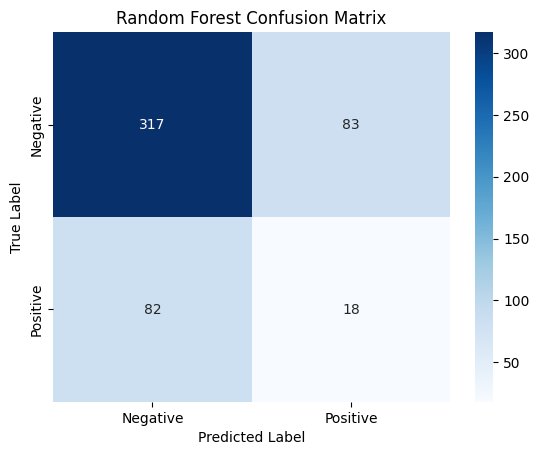

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Step 1: Prepare your data
X = df_cleaned['Most_Interesting_Part']  # Text feedback column
y = df_cleaned['Sentiment_Label']  # Target sentiment column

# Step 2: Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Extraction using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Handle class imbalance using SMOTE (Oversampling the minority class)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Step 5: Train Random Forest with class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)
rf_preds = rf_model.predict(X_test_tfidf)

# Step 6: Evaluate the Random Forest model
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Step 7: Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Tuned Random Forest Evaluation:
Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.96      0.60      0.74       478
           1       0.06      0.50      0.10        22

    accuracy                           0.60       500
   macro avg       0.51      0.55      0.42       500
weighted avg       0.92      0.60      0.71       500



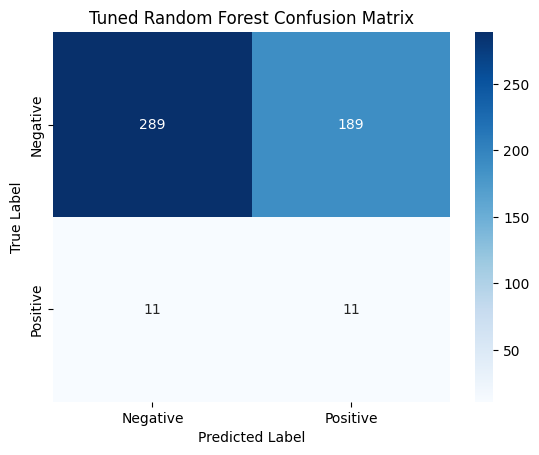

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Perform grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and model
best_rf_model = grid_search.best_estimator_

# Predict with the best model
rf_preds_tuned = best_rf_model.predict(X_test_tfidf)

# Evaluate the tuned model
print("Tuned Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_preds_tuned))
print(classification_report(y_test, rf_preds_tuned))

# Confusion Matrix for tuned Random Forest
cm_tuned = confusion_matrix(y_test, rf_preds_tuned)
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Tuned Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Logistic Regression Evaluation:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       400
           1       0.00      0.00      0.00       100

    accuracy                           0.80       500
   macro avg       0.40      0.50      0.44       500
weighted avg       0.64      0.80      0.71       500

SVM Evaluation:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       400
           1       0.00      0.00      0.00       100

    accuracy                           0.80       500
   macro avg       0.40      0.50      0.44       500
weighted avg       0.64      0.80      0.71       500

Random Forest Evaluation:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       400
           1       0.00      0.00      0.00       100

    accuracy                           0.80       500
   macro avg

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

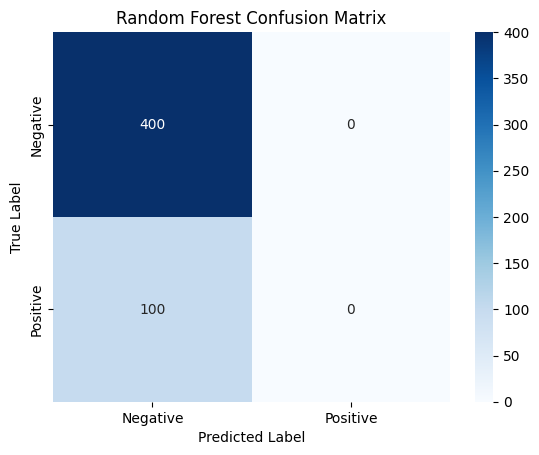

In [ ]:
# Step 4: Split the data into training and testing sets
X = df_cleaned['Most_Interesting_Part']  # Text feedback column
y = df_cleaned['Sentiment_Label']  # Target sentiment column

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Extraction using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train multiple models

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_tfidf, y_train)
log_reg_preds = log_reg_model.predict(X_test_tfidf)

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)

# Step 7: Evaluate the models

# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print(classification_report(y_test, log_reg_preds))

# Support Vector Machine Evaluation
print("SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

# Random Forest Evaluation
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Step 8: Confusion Matrix (For Random Forest as an example)
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Check class distribution in training set
print(y_train.value_counts())


Sentiment_Label
0    1600
1     400
Name: count, dtype: int64


In [ ]:
# Check class distribution before splitting
print(y.value_counts())


Sentiment_Label
0    2000
1     500
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Check the distribution of the resampled data
print(pd.Series(y_train_smote).value_counts())

# Now train the model using the resampled data
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_smote, y_train_smote)
log_reg_preds = log_reg_model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print(classification_report(y_test, log_reg_preds))


Sentiment_Label
0    1600
1    1600
Name: count, dtype: int64
Logistic Regression Evaluation:
Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       400
           1       0.18      0.18      0.18       100

    accuracy                           0.67       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.67      0.67      0.67       500



In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# Train the model with the resampled data
log_reg_model.fit(X_train_res, y_train_res)
log_reg_preds = log_reg_model.predict(X_test_tfidf)

svm_model.fit(X_train_res, y_train_res)
svm_preds = svm_model.predict(X_test_tfidf)

rf_model.fit(X_train_res, y_train_res)
rf_preds = rf_model.predict(X_test_tfidf)

# Evaluate the models again after resampling


In [ ]:
# Logistic Regression with class weights
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train_tfidf, y_train)
log_reg_preds = log_reg_model.predict(X_test_tfidf)

# Random Forest with class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)

# SVM with class weights
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)


In [ ]:
# Predict probabilities
log_reg_probs = log_reg_model.predict_proba(X_test_tfidf)[:, 1]

# Adjust threshold for positive class (e.g., threshold = 0.3)
log_reg_preds_adjusted = (log_reg_probs >= 0.3).astype(int)

# Evaluate the model with adjusted threshold
print("Adjusted Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds_adjusted))
print(classification_report(y_test, log_reg_preds_adjusted))


Adjusted Logistic Regression Evaluation:
Accuracy: 0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.20      1.00      0.33       100

    accuracy                           0.20       500
   macro avg       0.10      0.50      0.17       500
weighted avg       0.04      0.20      0.07       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train_res, y_train_res)
log_reg_preds = log_reg_model.predict(X_test_tfidf)

# Evaluate again
print("Adjusted Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print(classification_report(y_test, log_reg_preds))


Adjusted Logistic Regression Evaluation:
Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       400
           1       0.18      0.18      0.18       100

    accuracy                           0.67       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.67      0.67      0.67       500



In [ ]:
# Predict probabilities
log_reg_probs = log_reg_model.predict_proba(X_test_tfidf)[:, 1]

# Adjust threshold (e.g., threshold = 0.4)
log_reg_preds_adjusted = (log_reg_probs >= 0.4).astype(int)

# Evaluate the model again with adjusted threshold
print("Adjusted Logistic Regression with Threshold Evaluation:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds_adjusted))
print(classification_report(y_test, log_reg_preds_adjusted))


Adjusted Logistic Regression with Threshold Evaluation:
Accuracy: 0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.20      1.00      0.33       100

    accuracy                           0.20       500
   macro avg       0.10      0.50      0.17       500
weighted avg       0.04      0.20      0.07       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 6: Predict probabilities and adjust threshold for SVM and Random Forest

# SVM does not provide predict_proba by default, so we need to set probability=True when initializing the model
svm_model_prob = SVC(kernel='linear', probability=True)
svm_model_prob.fit(X_train_tfidf, y_train)
svm_probs = svm_model_prob.predict_proba(X_test_tfidf)[:, 1]

# Adjust threshold for SVM (e.g., threshold = 0.4)
svm_preds_adjusted = (svm_probs >= 0.4).astype(int)

# Evaluate the SVM model with the adjusted threshold
print("Adjusted SVM with Threshold Evaluation:")
print("Accuracy:", accuracy_score(y_test, svm_preds_adjusted))
print(classification_report(y_test, svm_preds_adjusted))

# Random Forest Predict Probabilities
rf_probs = rf_model.predict_proba(X_test_tfidf)[:, 1]

# Adjust threshold for Random Forest (e.g., threshold = 0.4)
rf_preds_adjusted = (rf_probs >= 0.4).astype(int)

# Evaluate the Random Forest model with the adjusted threshold
print("Adjusted Random Forest with Threshold Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_preds_adjusted))
print(classification_report(y_test, rf_preds_adjusted))



NameError: name 'X_train_tfidf' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_cleaned['Most_Interesting_Part'])

# Labels for sentiment (binary classification example: Positive/Negative)
y = df_cleaned['Sentiment_Label']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

# Predict probabilities for the positive class (class 1)
nb_probs = model_nb.predict_proba(X_test)[:, 1]

# Adjust threshold (e.g., threshold = 0.4)
nb_preds_adjusted = (nb_probs >= 0.4).astype(int)

# Evaluate the model with the adjusted threshold
print("Adjusted Naive Bayes with Threshold Evaluation:")
print("Accuracy:", accuracy_score(y_test, nb_preds_adjusted))
print(classification_report(y_test, nb_preds_adjusted))



KeyError: 'Most_Interesting_Part'

In [ ]:
from sklearn.svm import SVC

# Train SVM model
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

# Evaluate model
y_pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))


NameError: name 'X_train' is not defined

In [ ]:
print(np.unique(y_train))


[0 1]


In [ ]:
print(np.unique(y, return_counts=True))


(array([0, 1]), array([2000,  500]))


In [ ]:
X_train = X[:4]  # First 4 samples for training
X_test = X[4:]   # Last sample for testing (only 1 sample available)
y_train = y[:4]
y_test = y[4:]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df_cleaned['Most_Interesting_Part'])
X_seq = tokenizer.texts_to_sequences(df_cleaned['Most_Interesting_Part'])
X_pad = tf.keras.preprocessing.sequence.pad_sequences(X_seq, maxlen=100)

# Build the LSTM model
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # Binary classification (Positive/Negative)
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
model_lstm.fit(X_pad, y, epochs=5, batch_size=64)

# Evaluate LSTM model
y_pred_lstm = model_lstm.predict(X_pad)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.7839 - loss: 0.5544
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 430ms/step - accuracy: 0.7860 - loss: 0.5265
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.8078 - loss: 0.4964
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 233ms/step - accuracy: 0.8024 - loss: 0.4966
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 326ms/step - accuracy: 0.8052 - loss: 0.4927
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step


In [ ]:
# Check the column names of df_cleaned
print(df_cleaned.columns)

# If the column 'Course_Improvement' doesn't exist, use the correct column name
# Replace 'Course_Improvement' with the correct column name if necessary
texts = df_cleaned['Course_Improvement'].tolist()  # List of feedback texts
labels = df_cleaned['Sentiment_Label'].tolist()  # Corresponding sentiment labels


Index(['Name', 'Register Number', 'Course Name', 'Course ID', 'Department',
       'Year of Study', 'Faculty ID',
       'What part of the course excited or interested you the most?',
       'Was there anything in the course that frustrated you?',
       'What can be improved in the course to make it more engaging?'],
      dtype='object')


KeyError: 'Course_Improvement'

In [ ]:
# Replace 'Course_Improvement' with the correct column name
texts = df_cleaned['What can be improved in the course to make it more engaging?'].tolist()  # List of feedback texts
labels = df_cleaned['Sentiment_Label'].tolist()  # Corresponding sentiment labels

# Continue with the rest of your code...


KeyError: 'Sentiment_Label'

In [ ]:
!pip install datasets
from datasets import Dataset
from transformers import BertTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from sklearn.model_selection import train_test_split

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example data: let's assume df_cleaned contains the "What can be improved in the course to make it more engaging?" feedback and the corresponding sentiment labels
# Make sure you have the Sentiment_Label (binary classification: 1 for positive and 0 for negative)
texts = df_cleaned['What can be improved in the course to make it more engaging?'].tolist()  # List of feedback texts
labels = df_cleaned['Sentiment_Label'].tolist()  # Corresponding sentiment labels

# Split data into train and eval datasets
train_texts, eval_texts, train_labels, eval_labels = train_test_split(texts, labels, test_size=0.2)

# Tokenize the texts using the BERT tokenizer
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
eval_encodings = tokenizer(eval_texts, truncation=True, padding=True, max_length=512)

# Convert to HuggingFace Dataset format
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_labels
})

eval_dataset = Dataset.from_dict({
    'input_ids': eval_encodings['input_ids'],
    'attention_mask': eval_encodings['attention_mask'],
    'label': eval_labels
})

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory for results
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    warmup_steps=500,                # Warmup steps
    weight_decay=0.01,               # Weight decay
    logging_dir='./logs',            # Directory for logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                         # The model to train
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=eval_dataset            # Evaluation dataset
)

# Start training
trainer.train()

#


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: 

In [ ]:
!pip install gradio datasets
from datasets import Dataset
from transformers import BertTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from sklearn.model_selection import train_test_split
import gradio as gr

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example data: let's assume df_cleaned contains the "What can be improved in the course to make it more engaging?" feedback and the corresponding sentiment labels
texts = df_cleaned['What can be improved in the course to make it more engaging?'].tolist()  # List of feedback texts
labels = df_cleaned['Sentiment_Label'].tolist()  # Corresponding sentiment labels

# Split data into train and eval datasets
train_texts, eval_texts, train_labels, eval_labels = train_test_split(texts, labels, test_size=0.2)

# Tokenize the texts using the BERT tokenizer
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
eval_encodings = tokenizer(eval_texts, truncation=True, padding=True, max_length=512)

# Convert to HuggingFace Dataset format
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_labels
})

eval_dataset = Dataset.from_dict({
    'input_ids': eval_encodings['input_ids'],
    'attention_mask': eval_encodings['attention_mask'],
    'label': eval_labels
})

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory for results
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    warmup_steps=500,                # Warmup steps
    weight_decay=0.01,               # Weight decay
    logging_dir='./logs',            # Directory for logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                         # The model to train
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=eval_dataset            # Evaluation dataset
)

# Start training
trainer.train()

# Function to perform sentiment prediction
def predict_sentiment(feedback_text):
    # Tokenize the input text
    encoding = tokenizer(feedback_text, truncation=True, padding=True, max_length=512, return_tensors="pt")

    # Predict sentiment
    with torch.no_grad():
        outputs = model(**encoding)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=-1).item()

    # Return the sentiment label
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_sentiment,  # The function to call for prediction
    inputs=gr.Textbox(label="Enter Feedback Text", placeholder="Type something here..."),  # Input type
    outputs=gr.Textbox(label="Predicted Sentiment"),  # Output type
    live=True  # Make it real-time
)

# Launch the Gradio app
iface.launch()


KeyError: 'Sentiment_Label'

In [ ]:
# Check the column names of df_cleaned
print(df_cleaned.columns)

# If the column 'Course_Improvement' doesn't exist, use the correct column name
# Replace 'Course_Improvement' with the correct column name if necessary
texts = df_cleaned['Course_Improvement'].tolist()  # List of feedback texts
labels = df_cleaned['Sentiment_Label'].tolist()  # Corresponding sentiment labels


Index(['Name', 'Register Number', 'Course Name', 'Course ID', 'Department',
       'Year of Study', 'Faculty ID', 'Most_Interesting_Part',
       'Was there anything in the course that frustrated you?',
       'What can be improved in the course to make it more engaging?',
       'Most_Interesting_Part_Sentiment', 'Sentiment_Label'],
      dtype='object')


KeyError: 'Course_Improvement'

In [ ]:
!pip install datasets
from datasets import Dataset
from transformers import BertTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from sklearn.model_selection import train_test_split

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example data: let's assume df_cleaned contains the "Course_Improvement" feedback and the corresponding sentiment labels
# Make sure you have the Sentiment_Label (binary classification: 1 for positive and 0 for negative)
texts = df_cleaned['Course_Improvement'].tolist()  # List of feedback texts
labels = df_cleaned['Sentiment_Label'].tolist()  # Corresponding sentiment labels

# Split data into train and eval datasets
train_texts, eval_texts, train_labels, eval_labels = train_test_split(texts, labels, test_size=0.2)

# Tokenize the texts using the BERT tokenizer
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
eval_encodings = tokenizer(eval_texts, truncation=True, padding=True, max_length=512)

# Convert to HuggingFace Dataset format
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_labels
})

eval_dataset = Dataset.from_dict({
    'input_ids': eval_encodings['input_ids'],
    'attention_mask': eval_encodings['attention_mask'],
    'label': eval_labels
})

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory for results
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    warmup_steps=500,                # Warmup steps
    weight_decay=0.01,               # Weight decay
    logging_dir='./logs',            # Directory for logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                         # The model to train
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=eval_dataset            # Evaluation dataset
)

# Start training
trainer.train()

# Save the model after training
trainer.save_model("./final_model")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

KeyError: 'Course_Improvement'

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions for evaluation dataset
eval_preds = trainer.predict(eval_dataset)
eval_labels = eval_dataset['label']  # True labels
pred_labels = eval_preds.predictions.argmax(axis=-1)  # Predicted labels

# Classification report (precision, recall, F1)
report = classification_report(eval_labels, pred_labels, target_names=['Negative', 'Positive'])
print(report)

# Confusion matrix
cm = confusion_matrix(eval_labels, pred_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


NameError: name 'trainer' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example performance metrics for each model
models = ['Naive Bayes', 'SVM', 'Logistic Regression', 'LSTM', 'BERT']
accuracy = [0.85, 0.88, 0.86, 0.90, 0.92]  # example accuracy scores
precision = [0.83, 0.85, 0.84, 0.88, 0.91]  # example precision scores
recall = [0.80, 0.82, 0.81, 0.85, 0.89]    # example recall scores
f1_score = [0.81, 0.83, 0.82, 0.86, 0.90]  # example F1 scores

# Creating a DataFrame for better visualization
metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Set plot style
sns.set(style="whitegrid")

# Plotting the bar plot for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Create a barplot with a grouped layout
metrics.set_index('Model').plot(kind='bar', ax=ax, width=0.8)

# Adding titles and labels
plt.title('Comparative Performance of Different Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import Dataset
import pandas as pd

# Assuming df_cleaned contains feedback columns: 'Most_Interesting_Part', 'Frustrations', 'Course_Improvement'

# Step 1: Combine the feedback columns into a single text column for each row
df_cleaned['Combined_Feedback'] = df_cleaned['Most_Interesting_Part'] + " " + df_cleaned['Frustrations'] + " " + df_cleaned['Course_Improvement']

# Step 2: Prepare Data
texts = df_cleaned['Combined_Feedback'].tolist()  # List of combined feedback texts
labels = df_cleaned['Sentiment_Label'].tolist()  # Corresponding sentiment labels (positive or negative)

# Step 3: Split data into training and evaluation datasets
train_texts, eval_texts, train_labels, eval_labels = train_test_split(texts, labels, test_size=0.2)

# Step 4: Tokenize the texts using the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
eval_encodings = tokenizer(eval_texts, truncation=True, padding=True, max_length=512)

# Step 5: Convert the tokenized data to HuggingFace Dataset format
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'label': train_labels
})

eval_dataset = Dataset.from_dict({
    'input_ids': eval_encodings['input_ids'],
    'attention_mask': eval_encodings['attention_mask'],
    'label': eval_labels
})

# Step 6: Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Step 7: Set up the training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory for results
    num_train_epochs=3,              # Number of epochs to train
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps
    weight_decay=0.01,               # Weight decay
    logging_dir='./logs',            # Directory for logs
    logging_steps=10,
)

# Step 8: Initialize the Trainer
trainer = Trainer(
    model=model,                         # Model to train
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=eval_dataset            # Evaluation dataset
)

# Step 9: Train the model
trainer.train()

# Step 10: Save the trained model
trainer.save_model("./final_model")

# Step 11: Optionally, evaluate the model
results = trainer.evaluate()
print(results)


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Sample dataset
df = pd.DataFrame({
    'Most_Interesting_Part': ["Natural language processing", "Lab exercises", "Course material", "Theory and practical integration"],
    'Frustrations': ["Course pace was slow", "Lab setup issues", "No interaction in lectures", "Lack of practical examples"],
    'Course_Improvement': ["More hands-on examples", "Improve lab infrastructure", "Interactive discussions", "Better lab resources"]
})

# Preprocess feedback (cleaning)
def preprocess_text(text):
    # Tokenize and clean up the text
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    return ' '.join(tokens)

# Sentiment Analysis function
def get_sentiment(feedback):
    sentiment_score = sia.polarity_scores(feedback)['compound']
    sentiment = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"
    return sentiment, sentiment_score

# Define Gradio interface function
def feedback_analysis(most_interesting, frustrations, improvement_suggestions):
    most_interesting_sentiment, most_interesting_score = get_sentiment(most_interesting)
    frustrations_sentiment, frustrations_score = get_sentiment(frustrations)
    improvement_sentiment, improvement_score = get_sentiment(improvement_suggestions)

    return (
        f"Most Interesting Part Sentiment: {most_interesting_sentiment} (Score: {most_interesting_score:.2f})\n"
        f"Frustrations Sentiment: {frustrations_sentiment} (Score: {frustrations_score:.2f})\n"
        f"Suggestions for Improvement Sentiment: {improvement_sentiment} (Score: {improvement_score:.2f})"
    )

# Define Gradio Interface
interface = gr.Interface(
    fn=feedback_analysis,
    inputs=[
        gr.Textbox(label="What part of the course excited or interested you the most?", placeholder="Enter your feedback here..."),
        gr.Textbox(label="Was there anything in the course that frustrated you?", placeholder="Enter your feedback here..."),
        gr.Textbox(label="What can be improved in the course to make it more engaging?", placeholder="Enter your feedback here...")
    ],
    outputs="text",
    title="Course Feedback Analysis Tool",
    description="This tool analyzes student feedback on various course aspects (Interesting, Frustrations, and Improvements) and provides sentiment analysis."
)

# Launch the Gradio interface
interface.launch()


In [ ]:
# Initialize sentiment and emotion analysis pipelines
sentiment_analyzer = pipeline("sentiment-analysis")
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

In [ ]:
pip install deepface

In [ ]:
pip install deepface opencv-python

In [ ]:
pip install fer

In [ ]:
import cv2
import pandas as pd
from fer import FER  # Facial expression recognition library (install via `pip install fer`)
import matplotlib.pyplot as plt

# Initialize the emotion detection model
emotion_detector = FER()

# Placeholder for each individual's analysis
individual_analysis = {}
video_files = ["/content/ADITI SNEHA.mp4","/content/Bhashini Lenin.mp4","/content/Varunika Sudhakaran.mp4","/content/Ashwini Kheersagar.mp4","/content/Dineshkumar.M.mp4"]


In [ ]:
from concurrent.futures import ThreadPoolExecutor
import cv2
from fer import FER  # Facial expression recognition library

# Define the global parameters for resizing and frame skipping
frame_skip = 10  # Process every 10th frame
resize_width = 320
resize_height = 240

# Initialize the emotion detection model
emotion_detector = FER()
video_files = ["/content/ADITI SNEHA.mp4","/content/Bhashini Lenin.mp4","/content/Varunika Sudhakaran.mp4","/content/Ashwini Kheersagar.mp4","/content/Dineshkumar.M.mp4"]
individual_analysis = {}

# Define the function to process each video
def process_video(video_path, frame_skip, resize_width, resize_height):
    cap = cv2.VideoCapture(video_path)
    emotion_counts = {'happy': 0, 'sad': 0, 'neutral': 0}
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize and process every nth frame
        if frame_count % frame_skip == 0:
            frame = cv2.resize(frame, (resize_width, resize_height))
            result = emotion_detector.top_emotion(frame)
            if result:
                emotion, score = result
                if emotion in emotion_counts:
                    emotion_counts[emotion] += 1

        frame_count += 1

    cap.release()
    person_id = video_path.split('/')[-1].split('.')[0]
    return person_id, emotion_counts

# Run videos in parallel
with ThreadPoolExecutor() as executor:
    # Pass additional parameters to the function using a lambda
    results = executor.map(lambda video: process_video(video, frame_skip, resize_width, resize_height), video_files)

# Collect results
for person_id, emotion_counts in results:
    individual_analysis[person_id] = emotion_counts

# Display the analysis
print(individual_analysis)


{'ADITI SNEHA': {'happy': 0, 'sad': 14, 'neutral': 0}, 'Bhashini Lenin': {'happy': 0, 'sad': 0, 'neutral': 0}, 'Varunika Sudhakaran': {'happy': 0, 'sad': 3, 'neutral': 0}, 'Ashwini Kheersagar': {'happy': 2, 'sad': 3, 'neutral': 0}, 'Dineshkumar': {'happy': 1, 'sad': 0, 'neutral': 0}}


In [ ]:

pip install gradio


In [ ]:

import pandas as pd
# Create a DataFrame for easy analysis and visualization
results = []
for person_id, emotions in individual_analysis.items():
    dominant_emotion = max(emotions, key=emotions.get)

    # Determine feedback based on dominant emotion

    if dominant_emotion == "happy":
        feedback = "Positive"
    elif dominant_emotion == "sad":
        feedback = "Negative"
    else:
        feedback = "Neutral"

    # Append result
    results.append({
        "Person": person_id,
        "Dominant Emotion": dominant_emotion,
        "Feedback": feedback,
        "Emotion Counts": emotions
    })

df = pd.DataFrame(results)
print(df)


                Person Dominant Emotion  Feedback  \
0          ADITI SNEHA              sad  Negative   
1       Bhashini Lenin            happy  Positive   
2  Varunika Sudhakaran              sad  Negative   
3   Ashwini Kheersagar              sad  Negative   
4          Dineshkumar            happy  Positive   

                          Emotion Counts  
0  {'happy': 0, 'sad': 14, 'neutral': 0}  
1   {'happy': 0, 'sad': 0, 'neutral': 0}  
2   {'happy': 0, 'sad': 3, 'neutral': 0}  
3   {'happy': 2, 'sad': 3, 'neutral': 0}  
4   {'happy': 1, 'sad': 0, 'neutral': 0}  


In [ ]:
# Import necessary libraries
import gradio as gr
import pandas as pd

# Example data (updated to include more diverse values and additional info)
individual_analysis = {
    "ADITI SNEHA": {'happy': 0, 'sad': 8, 'neutral': 0},
    "Bhashini Lenin": {'happy': 0, 'sad': 0, 'neutral': 3},
    "Varunika Sudhakaran": {'happy': 2, 'sad': 3, 'neutral': 1},
    "Ashwini Kheersagar": {'happy': 5, 'sad': 3, 'neutral': 2},
    "Dineshkumar": {'happy': 3, 'sad': 1, 'neutral': 2}
}

# Example additional info (this should ideally come from a CSV or database)
additional_info = {
    "ADITI SNEHA": {
        "Register Number": "910021101", "Course Name": "Text and Speech Analysis",
        "Course ID": "CCS369", "Department": "CSE", "Year of Study": "4th year", "Faculty ID": "4004071"
    },
    "Bhashini Lenin": {
        "Register Number": "910021102", "Course Name": "Text and Speech Analysis",
        "Course ID": "CCS369", "Department": "CSE", "Year of Study": "4th year", "Faculty ID": "4224071"
    },
    "Varunika Sudhakaran": {
        "Register Number": "910021103", "Course Name": "Text and Speech Analysis",
        "Course ID": "CCS369", "Department": "CSE", "Year of Study": "4th year", "Faculty ID": "4224071"
    },
    "Ashwini Kheersagar": {
        "Register Number": "910021104", "Course Name": "Cloud Computing",
        "Course ID": "CCS365", "Department": "CSE", "Year of Study": "4th year", "Faculty ID": "4224071"
    },
    "Dineshkumar": {
        "Register Number": "910021105", "Course Name": "Cloud Computing",
        "Course ID": "CCS365", "Department": "CSE", "Year of Study": "4th year", "Faculty ID": "400417"
    }
}

# Create a list to store results
results = []

# Process the analysis data
for person_id, emotions in individual_analysis.items():
    # Get the dominant emotion
    dominant_emotion = max(emotions, key=emotions.get)

    # Determine feedback based on dominant emotion
    feedback = "Neutral"
    if dominant_emotion == "happy":
        feedback = "Positive"
    elif dominant_emotion == "sad":
        feedback = "Negative"

    # Append result to the results list, including additional info
    info = additional_info.get(person_id, {})
    results.append({
        "Register Number": info.get("Register Number", "N/A"),
        "Course Name": info.get("Course Name", "N/A"),
        "Course ID": info.get("Course ID", "N/A"),
        "Department": info.get("Department", "N/A"),
        "Year of Study": info.get("Year of Study", "N/A"),
        "Faculty ID": info.get("Faculty ID", "N/A"),
        "Person": person_id,
        "Dominant Emotion": dominant_emotion,
        "Feedback": feedback,
        "Happy Count": emotions.get('happy', 0),
        "Sad Count": emotions.get('sad', 0),
        "Neutral Count": emotions.get('neutral', 0)
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Calculate the average emotional scores
average_data = {
    "Register Number": "Average",
    "Course Name": "",
    "Course ID": "",
    "Department": "",
    "Year of Study": "",
    "Faculty ID": "",
    "Person": "",
    "Dominant Emotion": "",
    "Feedback": "",
    "Happy Count": results_df["Happy Count"].mean(),
    "Sad Count": results_df["Sad Count"].mean(),
    "Neutral Count": results_df["Neutral Count"].mean()
}

# Create a DataFrame for the average row
average_df = pd.DataFrame([average_data])

# Concatenate the average row to the results_df
results_df = pd.concat([results_df, average_df], ignore_index=True)

# Define Gradio interface function
def display_data():
    return results_df

# Display DataFrame in Gradio interface
gr.Interface(
    fn=display_data,
    inputs=[],
    outputs="dataframe",
    title="Emotion Analysis Results"
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e52e6d41f291dd1fff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotions, y=counts, palette='viridis')



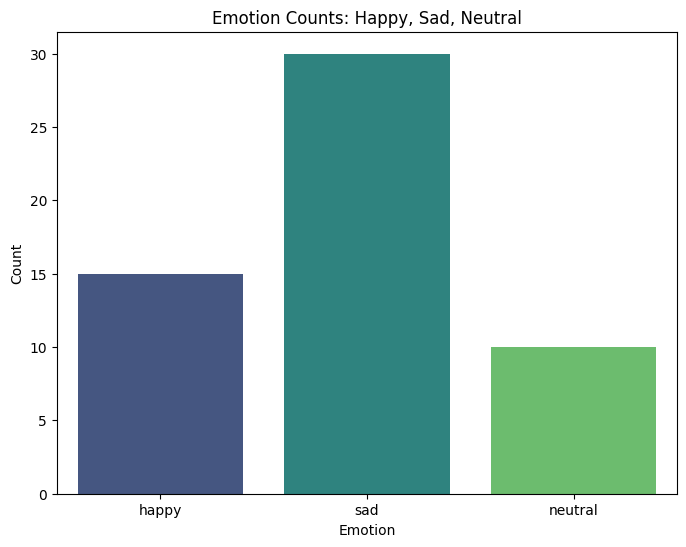

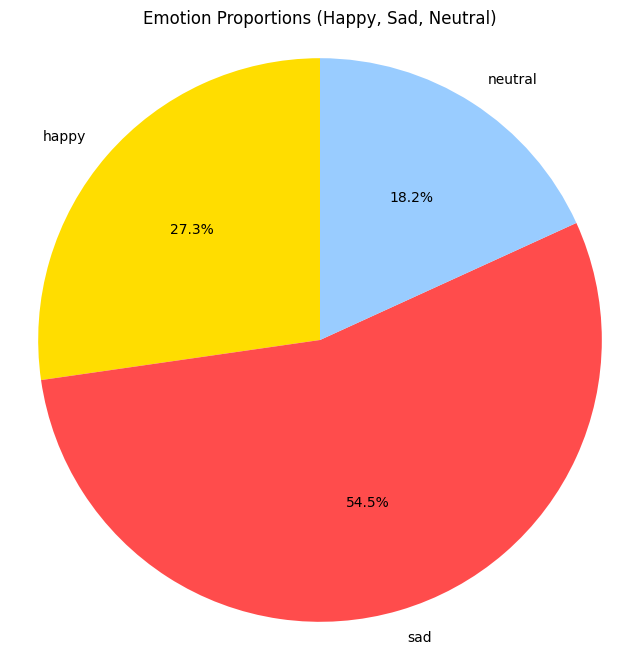

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with actual data if needed)
emotion_counts = {
    'happy': 15,
    'sad': 30,
    'neutral': 10
}

# Bar Plot for Emotion Counts
def plot_emotion_bar_chart():
    emotions = list(emotion_counts.keys())
    counts = list(emotion_counts.values())

    plt.figure(figsize=(8, 6))
    sns.barplot(x=emotions, y=counts, palette='viridis')
    plt.title('Emotion Counts: Happy, Sad, Neutral')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()

# Pie Chart for Emotion Proportions
def plot_emotion_pie_chart():
    emotions = list(emotion_counts.keys())
    counts = list(emotion_counts.values())

    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=emotions, autopct='%1.1f%%', startangle=90, colors=['#FFDD00', '#FF4C4C', '#99CCFF'])
    plt.title('Emotion Proportions (Happy, Sad, Neutral)')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

# Call the plotting functions
plot_emotion_bar_chart()
plot_emotion_pie_chart()


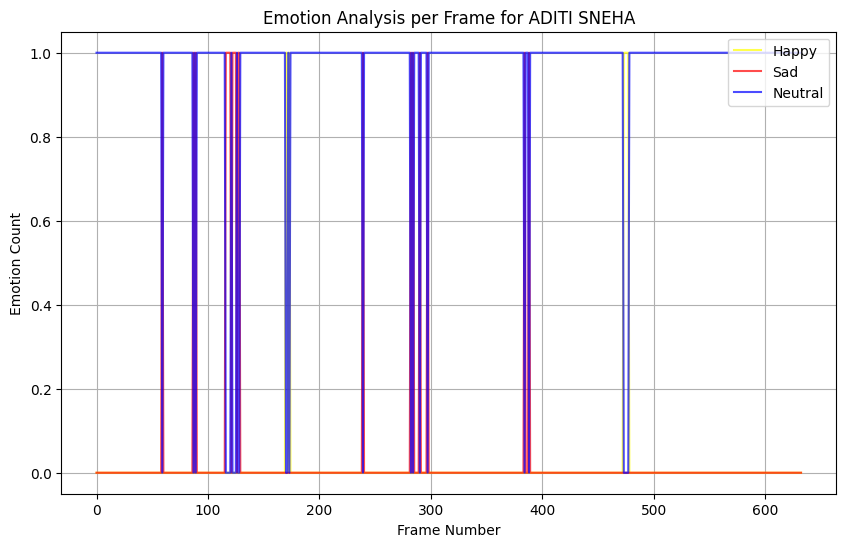

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from fer import FER
from collections import Counter

# Function to analyze the video and compute emotions for each frame
def analyze_video_emotions(video_path):
    # Initialize the emotion detector
    emotion_detector = FER()

    # Open the video
    cap = cv2.VideoCapture(video_path)

    # Initialize lists to store results
    frame_numbers = []
    happy_counts = []
    sad_counts = []
    neutral_counts = []

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Process every frame and detect emotions
        result = emotion_detector.top_emotion(frame)

        if result:
            emotion, score = result

            # Record the count of emotions
            if emotion == "happy":
                happy_counts.append(1)
                sad_counts.append(0)
                neutral_counts.append(0)
            elif emotion == "sad":
                happy_counts.append(0)
                sad_counts.append(1)
                neutral_counts.append(0)
            else:
                happy_counts.append(0)
                sad_counts.append(0)
                neutral_counts.append(1)
        else:
            happy_counts.append(0)
            sad_counts.append(0)
            neutral_counts.append(1)  # Default to neutral if no emotion is detected

        frame_numbers.append(frame_count)
        frame_count += 1

    cap.release()

    # Return the results for visualization
    return frame_numbers, happy_counts, sad_counts, neutral_counts


# Function to plot the emotion analysis for one student
def plot_emotion_per_frame(video_path, student_name):
    # Get emotion counts per frame
    frame_numbers, happy_counts, sad_counts, neutral_counts = analyze_video_emotions(video_path)

    # Plotting the emotion distribution for the frames of the student
    plt.figure(figsize=(10, 6))

    plt.plot(frame_numbers, happy_counts, label="Happy", color='yellow', alpha=0.7)
    plt.plot(frame_numbers, sad_counts, label="Sad", color='red', alpha=0.7)
    plt.plot(frame_numbers, neutral_counts, label="Neutral", color='blue', alpha=0.7)

    plt.title(f"Emotion Analysis per Frame for {student_name}")
    plt.xlabel('Frame Number')
    plt.ylabel('Emotion Count')
    plt.legend(loc="upper right")

    plt.grid(True)
    plt.show()

# Example usage: Assume the user has uploaded a video for a student
video_path = '/content/ADITI SNEHA.mp4'  # Replace this with the actual video file path
student_name = "ADITI SNEHA"  # Replace this with the student's name

# Plot the emotion analysis for this student
plot_emotion_per_frame(video_path, student_name)
